In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("baseball.csv")
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403


In [3]:
data.shape

(1232, 15)

In [4]:
data["G"].unique()

array([162, 161, 163, 160, 164, 159, 158, 165])

In [73]:
data["Year"].unique()

array([2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1971, 1970, 1969, 1968, 1967, 1966, 1965,
       1964, 1963, 1962])

In [74]:
data.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [75]:
data = data.drop(data.iloc[:,10:12],axis=1)
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403


In [82]:
# display rows with NaN values
df1 = data[data.isnull().any(axis=1)]
#print(df1)

In [77]:
data = data.dropna(how="any")
data.isnull().sum()

Team        0
League      0
Year        0
RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
G           0
OOBP        0
OSLG        0
dtype: int64

In [78]:
data.shape

(420, 13)

In [79]:
# Runs differential
data["RD"] = data["RS"] - data["RA"]
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403,7


## Correlation Matrix

Pythagorean Expectation Formula: (Runs scored)^2 / (Runs scored)^2 + (Runs Allowed)^2 = Win % for team

Find independent features that correlate with RS, RA

Run Differential (cumulative statistic that combines offense and defense scoring) = RS-RA

RD can be used to predict the expected win total for a team.

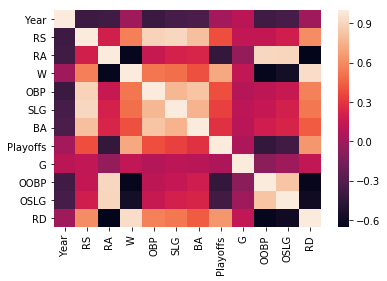

In [80]:
corrmat = data.corr()
sns.heatmap(corrmat)
plt.show()

## Pairplot (Histograms & Scatterplots)

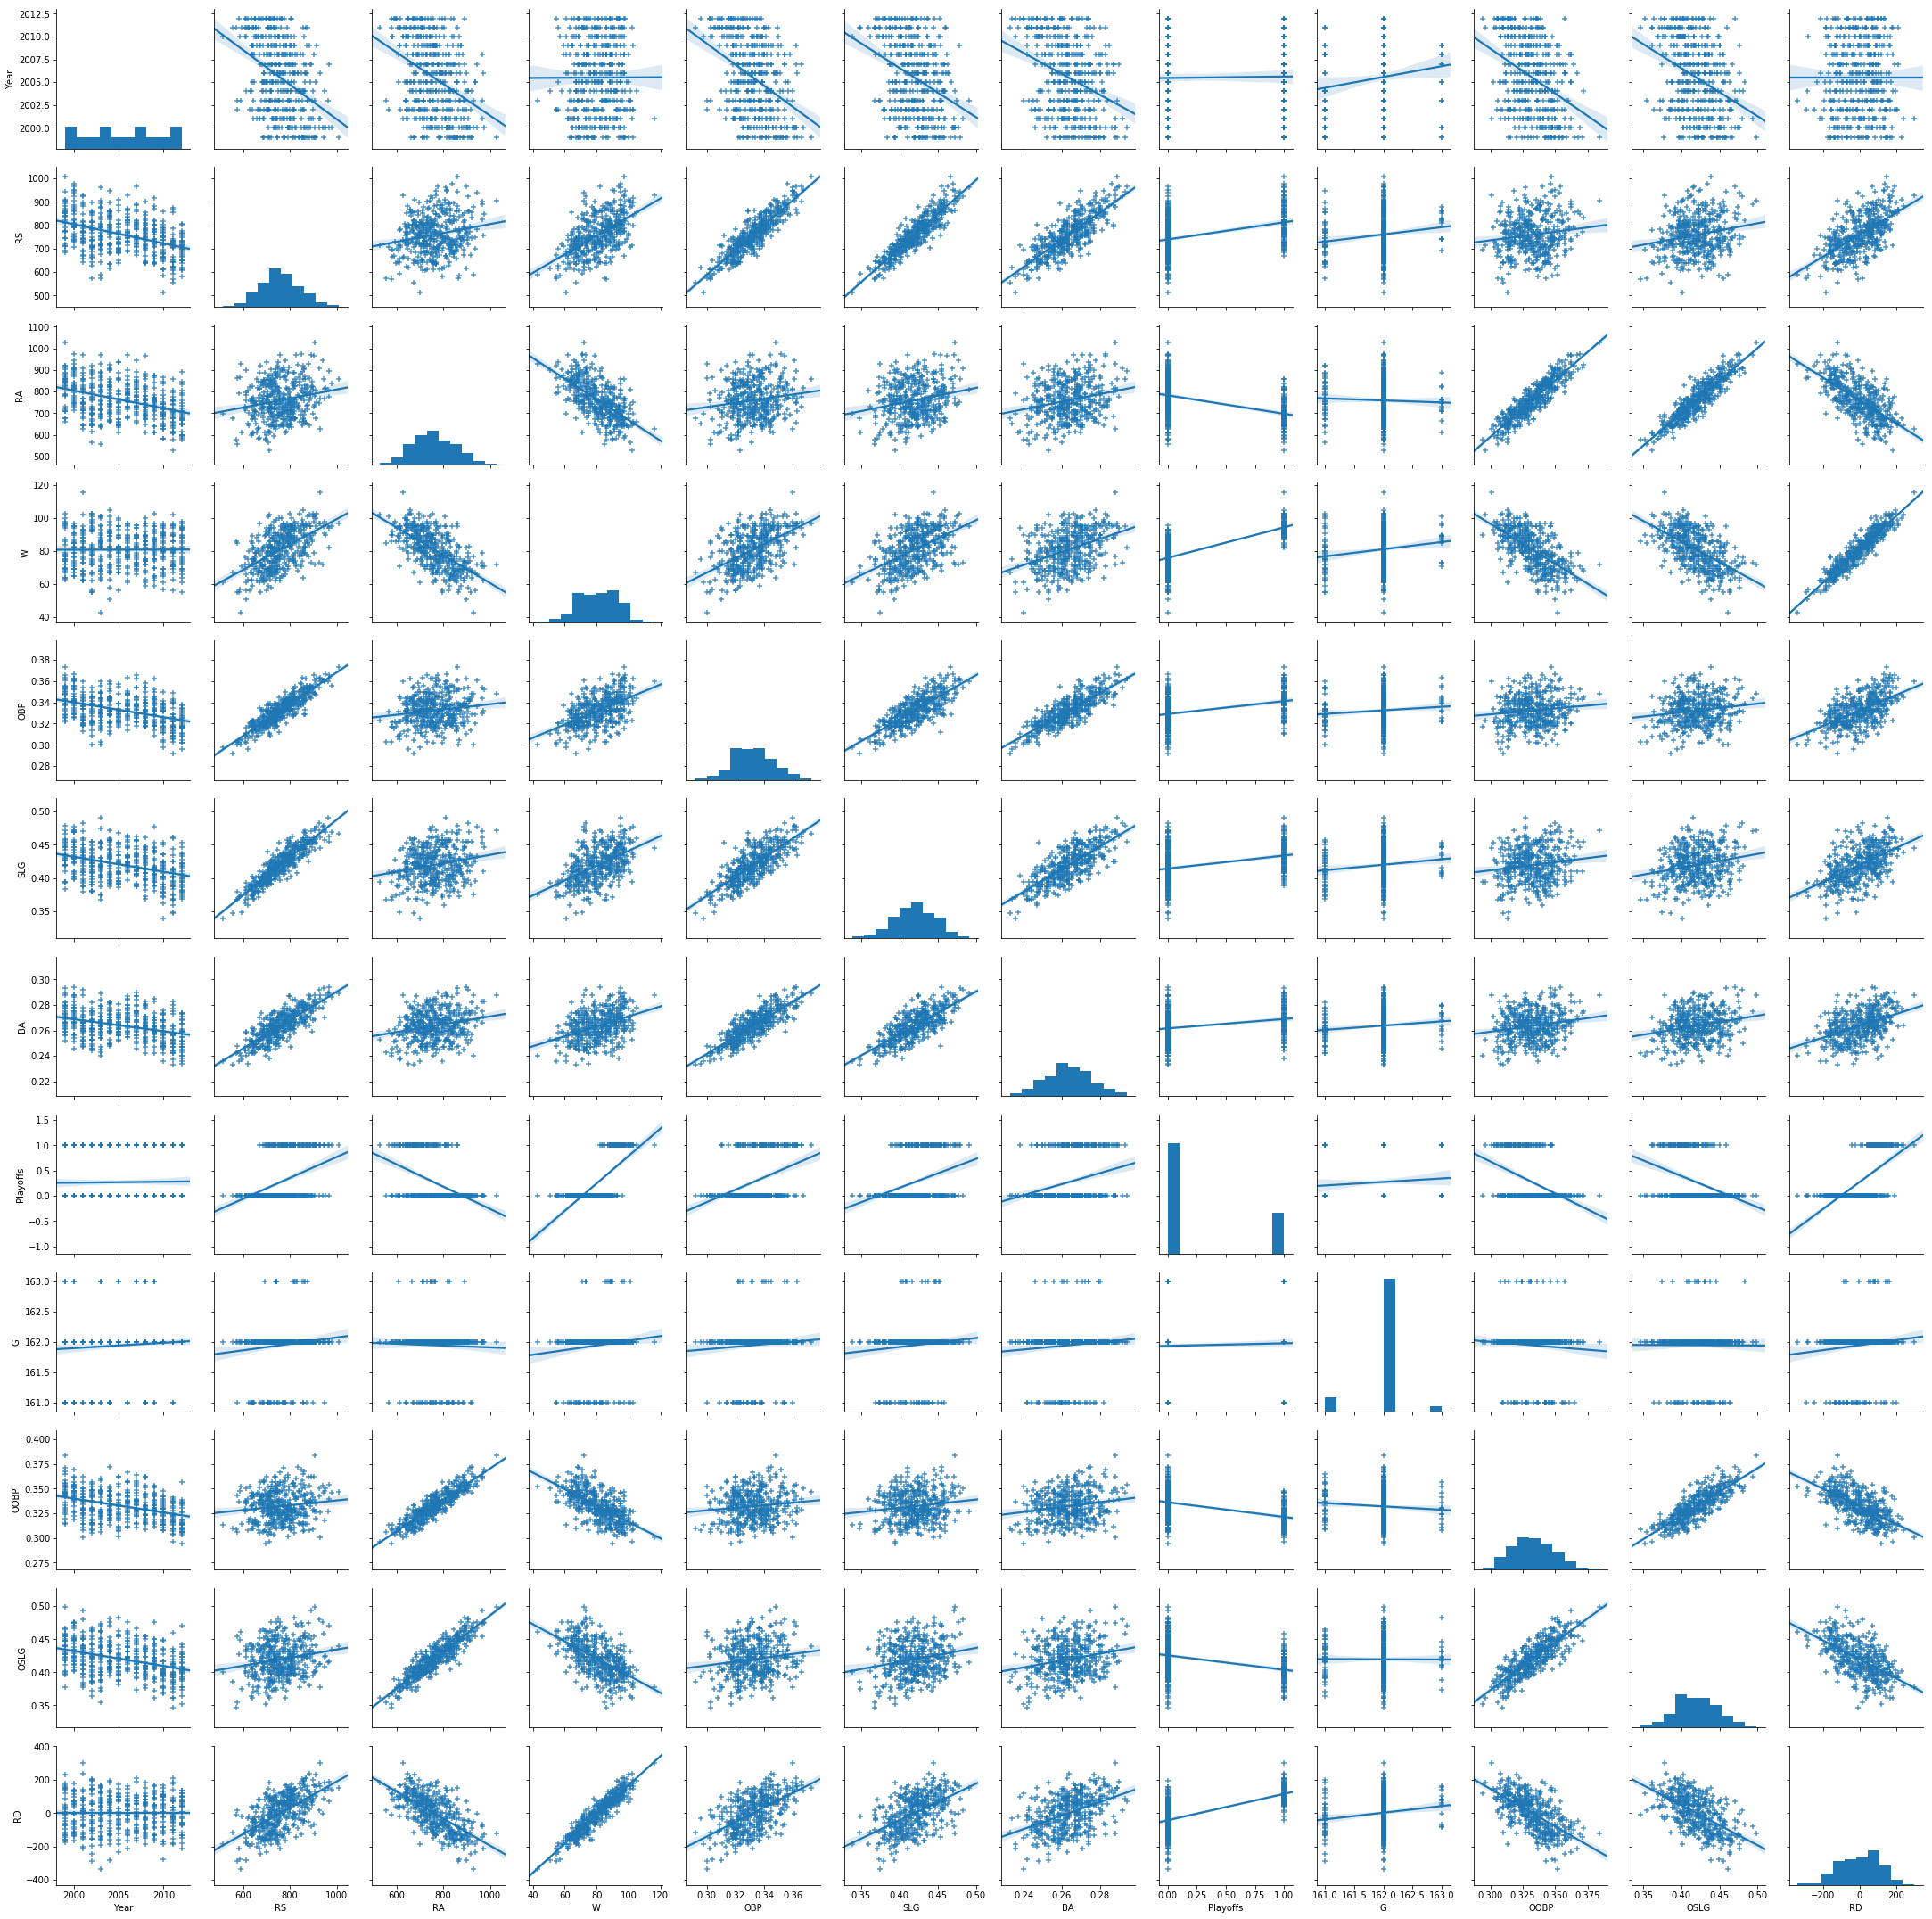

In [81]:
sns.pairplot(data,markers="+",kind="reg")
plt.show()